**Model evaluation and selection**

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

dataset = datasets.load_boston()

c:\Users\USER\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [2]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from collections import OrderedDict

In [7]:
# Used in the cross-validation below
# to ensure that the random splits will be reproducible
rand_state = 1234

In [6]:
# Prepare the data
x = dataset['data'][:, [12]] # used LSTAT as a feature
y = dataset['target']

In [8]:
errors_train = OrderedDict() # Dict of errors measured in training sets
errors_val = OrderedDict() # Dict of errors measured in validation sets
poly = OrderedDict() # Dict of transformers
models = OrderedDict() # Dict of models

In [10]:
for deg in range(1, 13):
    model_name = 'poly' + str(deg)
    poly[model_name] = PolynomialFeatures(degree=deg, include_bias=False)

    # Cross-validation
    errors_train[model_name] = []
    errors_val[model_name] = []
    kf = KFold(n_splits=5, shuffle=True, random_state=rand_state)
    for train_index, val_index in kf.split(x):
        # Split the data
        x_train, x_val = x[train_index], x[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Preprocess the data
        x_train_poly = poly[model_name].fit_transform(x_train)
        x_val_poly = poly[model_name].transform(x_val)
        
        # Init a linear model
        model = linear_model.LinearRegression(normalize=True)
        # Train the model
        model.fit(x_train_poly, y_train)

        models[model_name] = model

        # Evaluate on the training set
        y_train_pred = model.predict(x_train_poly)
        mse = mean_squared_error(y_train, y_train_pred)
        errors_train[model_name].append(mse)

        # Evaluate on the validation set
        y_val_pred = model.predict(x_val_poly)
        mse = mean_squared_error(y_val, y_val_pred)
        errors_val[model_name].append(mse)

c:\Users\USER\miniconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\USER\miniconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

Text(0, 0.5, 'MSE')

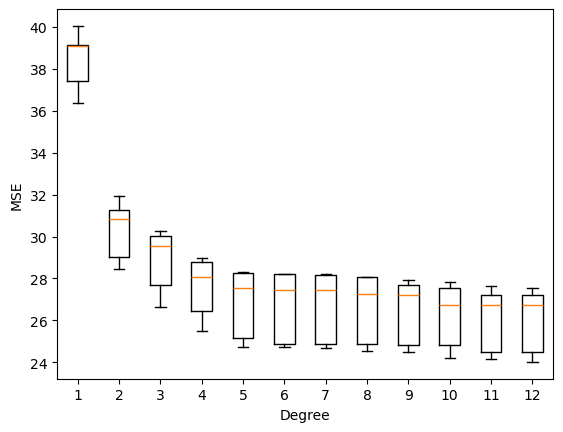

In [11]:
# Plot training errors
bp_train = plt.boxplot(errors_train.values())
plt.xlabel('Degree')
plt.ylabel('MSE')

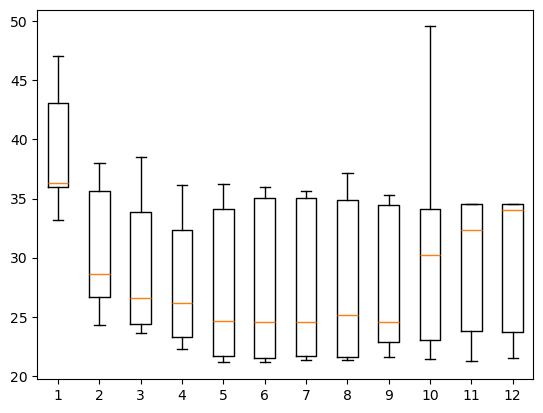

In [12]:
# Plot validation errors
bp_val = plt.boxplot(errors_val.values(), showfliers=False)

Text(0, 0.5, 'MSE Average')

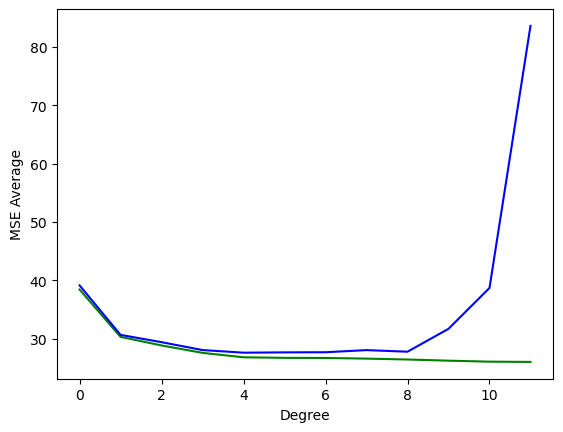

In [ ]:
# Plot the training error mean and the validation error mean
mse_means_train = []
for model_name, errors in errors_train.items():
    mse_means_train += [np.mean(errors)]

mse_means_val = []
for model_name, errors in errors_val.items():
    mse_means_val += [np.mean(errors)]

_ = plt.plot(mse_means_train, c='g')
_ = plt.plot(mse_means_val, c='b')
plt.xlabel('Degree')
plt.ylabel('MSE Average')

# Select model with degree=5 because low difference between training error and validation error
# And choosing anything below is underfitting and after is overfitting

Text(0, 0.5, 'Price')

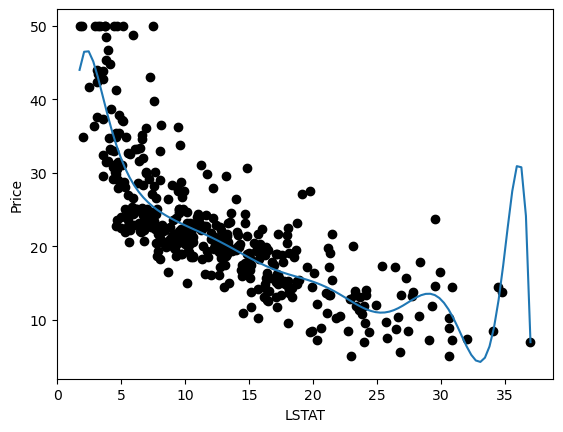

In [18]:
# The 12th degree polynomial model
model_name = 'poly12'

fig, ax = plt.subplots()
ax.scatter(x_train, y_train, c='black')
x_model = np.linspace(start=min(x_train), stop=max(x_train), num=100).reshape([100, 1])
ax.plot(x_model, models[model_name].predict(poly[model_name].transform(x_model)))
ax.set_xlabel('LSTAT')
ax.set_ylabel('Price')

Text(0, 0.5, 'Price')

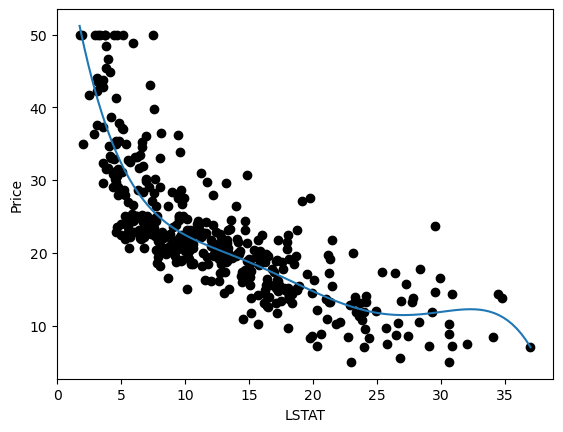

In [19]:
# The 5th degree polynomial model
model_name = 'poly5'

fig, ax = plt.subplots()
ax.scatter(x_train, y_train, c='black')
x_model = np.linspace(start=min(x_train), stop=max(x_train), num=100).reshape([100, 1])
ax.plot(x_model, models[model_name].predict(poly[model_name].transform(x_model)))
ax.set_xlabel('LSTAT')
ax.set_ylabel('Price')

In [20]:
# Weight of the 12th degree polynomial model
print(models['poly12'].coef_, models['poly12'].intercept_)

[ 1.55631822e+02 -8.37091096e+01  2.38576595e+01 -4.24499990e+00
  5.06319116e-01 -4.18465608e-02  2.42426701e-03 -9.79501399e-05
  2.69764002e-06 -4.81748745e-08  5.01987804e-10 -2.31339429e-12] -67.02976184625639
